# Isobar amplitude analysis formalism
The isobar formalism defines a three-body decay amplitude as a coherent sum over $N$ components, whilch parameterise the intermediate resonant or nonresonant processes:
\begin{equation}
 A(\xi) = \sum\limits_{j}^{N}c_jF_j(\xi),
\end{equation}
where $\xi$ denotes the Dalitz variables.

A resonant component $F$ contains strong interaction dynamics and is parameterised as
\begin{equation}
 F(\xi) \propto R(\xi_i)\cdot T(\vec{p}, \vec{q})\cdot X(|\vec{p}|r_{BW}^P) \cdot X(|\vec{q}|r_{BW}^R)
\end{equation}

In [ ]:
import sys
sys.path.append("../lib/")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker

from DalitzModel import *
from BWRes import *

%matplotlib inline
plt.rc('animation', html='html5')
plt.rc('text', usetex=True)
plt.rc('font', size=18)

In [2]:
from PlotUtility import plot_ddist, show_phase_space, plot_density_countours, projections

## Model initialization
Define a $D^0 \to K_S^0 \pi^+ \pi^-$ decay model with two resonances: $\rho(770)$ and $K^*(892)$

In [3]:
model = DalitzModel(.475, .135, .135, 1.865)
model.add_bw('rho(770)', .770, .1490, 1, 'BC')
model.add_bw('K*', .89166, 0.0508, 1, 'AB', 0.638*np.exp(1j*np.radians(133.2)))

## Density contour plot

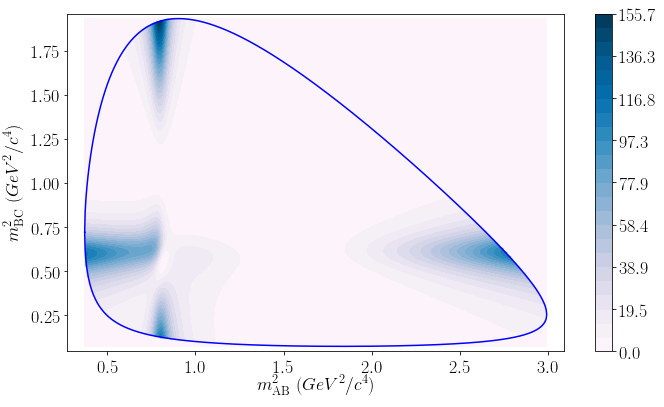

In [4]:
plot_density_countours(model, 'AB', 'BC', 6, (10, 6))
show_phase_space(model, 'AB', 'BC', 6, 'blue')
plt.show()

## Sampling Dalitz distribution
### Neumann's method

In [5]:
from DPGen import DPGen

In [6]:
genmodel = DPGen(model)
majorant = genmodel.assess_majorant()
majorant

237.67563382701283

$10^6$ events are generated in about 11 seconds with the Neumann's method:

In [7]:
%%time
rtype1, rtype2 = 'AB', 'BC'
smpl = genmodel(10**6, rtype1, rtype2, True)
mab_sq, mbc_sq = smpl[rtype1], smpl[rtype2]

0 1000000
43661 events generated
43661 1000000
130745 events generated
130745 1000000
260958 events generated
260958 1000000
434717 events generated
434717 1000000
652107 events generated
652107 1000000
912825 events generated
912825 1000000
1217315 events generated
Efficiency: 0.173902142857
CPU times: user 10.6 s, sys: 337 ms, total: 11 s
Wall time: 10.9 s


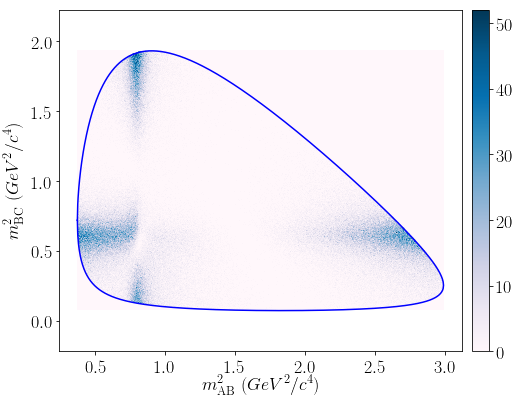

In [8]:
plot_ddist(smpl, rtype1, rtype2, 400, 5)
show_phase_space(model, rtype1, rtype2, 5)
plt.show()

In [9]:
from PhspGen import PhspGen
phspgen = PhspGen(model)
usmpl = phspgen(10**6, 'AB', 'BC', None, True)

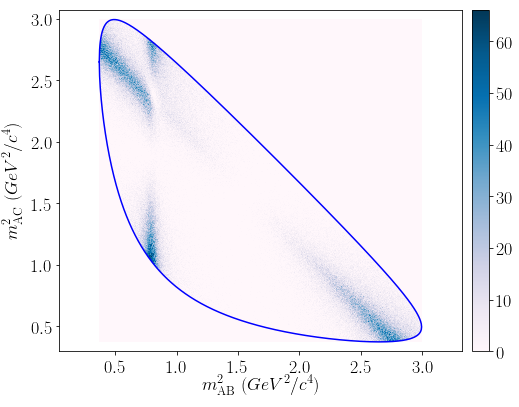

In [16]:
mac_sq = model.thirdMsq(mab_sq, mbc_sq)
plot_ddist(smpl, 'AB', 'AC', 400, 5)
show_phase_space(model, 'AB', 'AC', 5)
plt.show()

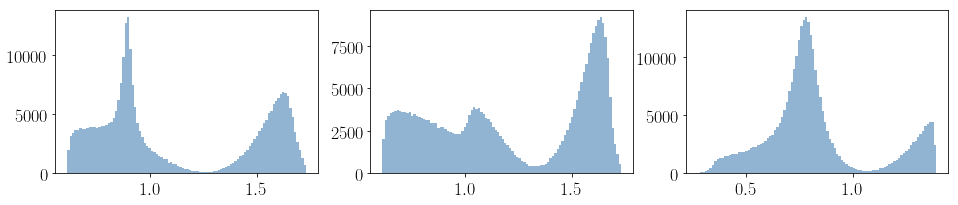

In [11]:
projections(smpl)
plt.show()

## Animated interference

In [12]:
from matplotlib import animation

In [13]:
FIG = plt.figure(num=9, figsize=(9, 6))
AXES = plt.axes()
show_phase_space(model, 'AB', 'BC', 9, 'blue')
plt.grid()
plt.title(r'$\rho(770)$ -- $K^*(892)$ interference')
plt.close()

In [14]:
ims = []
for i in range(200):
    model.rdict['K*']['ampl'] *= np.exp(1j * np.pi / 100)
    msq1g, msq2g, dens = model.grid_dens('AB', 'BC')
    levels = np.linspace(0, max(dens.flatten()), 25)
    cont = AXES.contourf(msq1g, msq2g, dens, cmap=plt.cm.PuBu, levels=levels)
    add_arts = cont.collections
    text = ''
    te = AXES.text(90, 90, str(text))
    an = AXES.annotate(str(text), xy=(0.45, 1.05), xycoords='axes fraction')
    ims.append(add_arts + [te,an])
    if (i+1) % 10 == 0:
        print 'frame {} / {}'.format(i+1, 200)

frame 10 / 200
frame 20 / 200
frame 30 / 200
frame 40 / 200
frame 50 / 200
frame 60 / 200
frame 70 / 200
frame 80 / 200
frame 90 / 200
frame 100 / 200
frame 110 / 200
frame 120 / 200
frame 130 / 200
frame 140 / 200
frame 150 / 200
frame 160 / 200
frame 170 / 200
frame 180 / 200
frame 190 / 200
frame 200 / 200


In [15]:
ani = animation.ArtistAnimation(FIG, ims, interval=20, blit=True)
ani